In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from transformers import AutoTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, LSTM, RNN
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import mean_squared_error
import shap

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/data_dig.csv', sep=',')
df.head(10)

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1
5,من پکیج کاملش روخریدم ازهرنظرعالیه هیچ نقد...,60,1
6,اول از همه خوشحالم که بالاخره نسخه های 128 گیگ...,96,1
7,من دو ماهه خریدم واقعا راضیم دوربینشم عالیه ...,100,1
8,بنظر من گوشی خوب و مقرون به صرفه ای بود توی ای...,100,1
9,از خریدم راضی ام و گوشی بینظیریه منتهی یه ایر...,92,1


In [ ]:
print(df.loc[22, 'Text'])


موبایل را خریدم   راحت هک میشه   اس ام اس دادن باهاش زجر آوره   لیست بلک لیست تماس و بلک لیست پیامش کمه   تعداد فولدر های پیام کم است   یکی چند بار با هک کردن موبایلم با لیست کانتکت های من تماس گرفته   یک بار هم گوشی روی میز بود که هکر با گوشی به کانتکت من زنگ زده و قطع کرده   یک بار هم ساعت 2 نصفه شب طرف موبایلم را هک کرده و به کانتکت من زنگ زده چند بار    لطفا فقط موبایلی که محافظت داره و نمیشه راحت هکش کرد بیارین   این بلا سر گوشی اچ تی سی چاچا هم برایم پیش اومده است   


In [ ]:
# Get unique values from a column
unique_values = pd.unique(df['Suggestion'])
print(unique_values)

[1 3 2]


In [ ]:
print(df.columns)
print(len(df))

Index(['Text', 'Score', 'Suggestion'], dtype='object')
3261


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        3261 non-null   object
 1   Score       3261 non-null   int64 
 2   Suggestion  3261 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 76.6+ KB
None
             Score  Suggestion
count  3261.000000  3261.00000
mean     74.719411     1.41061
std      21.514015     0.72408
min       0.000000     1.00000
25%      60.000000     1.00000
50%      80.000000     1.00000
75%      92.000000     2.00000
max     100.000000     3.00000


In [ ]:
df.nunique()

,0
Text,3021
Score,31
Suggestion,3


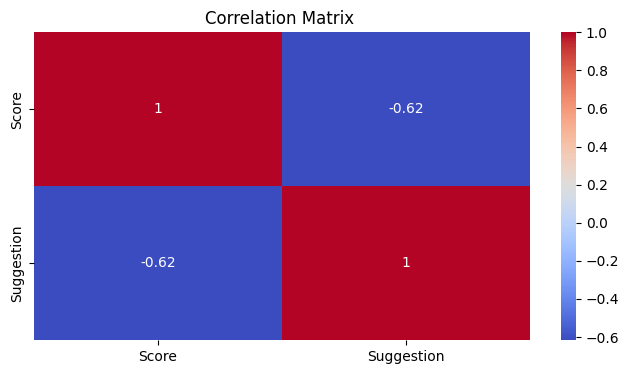

In [ ]:
# انتخاب فقط ستون‌های عددی
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# محاسبه همبستگی فقط روی ستون‌های عددی
corr_matrix = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix ")
plt.show()


In [ ]:
df.isnull().sum()

,0
Text,0
Score,0
Suggestion,0


In [ ]:
# df = df.drop_duplicates()
# len(df)

In [3]:
df['Score'] = df["Score"].apply(lambda score: 'Positive' if score >= 50 else 'Negative')

In [4]:
df['Score'] = df['Score'].map({'Positive': 1, 'Negative':0})

In [5]:
df.head()

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,1,1
1,خرید این محصول رو توصیه میکنم,1,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,1,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,1,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,1,1


In [5]:
print(df['Score'].value_counts())

Score
1    2917
0     344
Name: count, dtype: int64


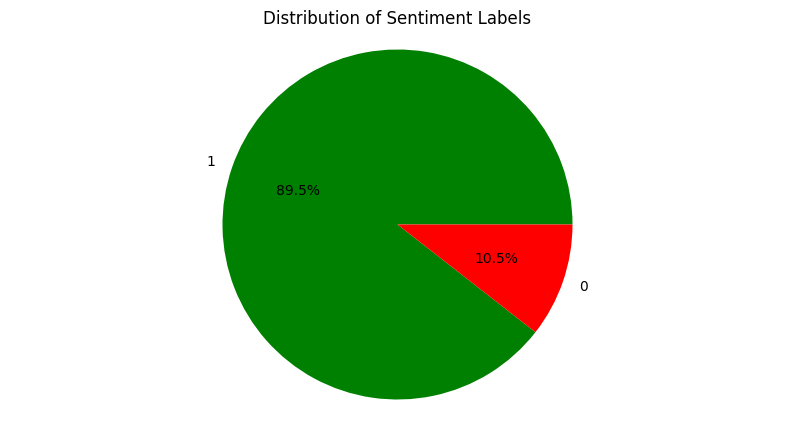

In [6]:
label = df['Score'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(label, labels=label.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribution of Sentiment Labels')
plt.axis('equal')
plt.show()

In [6]:
from sklearn.utils import resample

df_majority = df[df['Score'] == 1]
df_minority = df[df['Score'] == 0]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

print(df_upsampled['Score'].value_counts())


Score
1    2917
0    2917
Name: count, dtype: int64


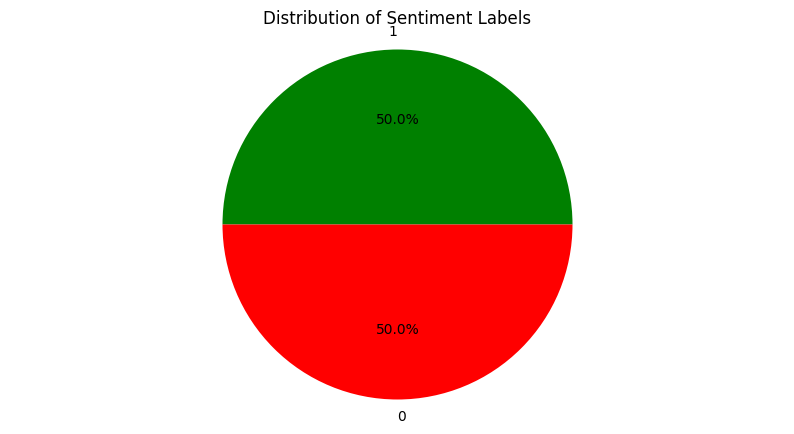

In [8]:
label = df_upsampled['Score'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(label, labels=label.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribution of Sentiment Labels')
plt.axis('equal')
plt.show()

In [7]:
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

def tokenize_texts(texts, max_len=512):
    input_ids = []
    for text in texts:
        encoded = tokenizer.encode(text, add_special_tokens=True, max_length=max_len, truncation=True)
        input_ids.append(encoded)
    input_ids = pad_sequences(input_ids, maxlen=max_len, padding='post', truncating='post')
    return input_ids

X_text = tokenize_texts(df_upsampled['Text'].tolist(), max_len=512)

X_suggestion = df_upsampled['Suggestion'].values.reshape(-1, 1)

X = np.concatenate((X_text, X_suggestion), axis=1)
y = df_upsampled['Score'].values
type(X)

numpy.ndarray

In [8]:
X[0]

array([    2,  2042,  3001,  3482,  2078,  2073,  2637,  5377,  2209,
        2539,   306, 15712,  3364,  2031,  4856,  7510,  2209,  2752,
       75108, 66652,  1177,  3062,  2063,  3321,  3852,  2209,     4,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [9]:
vocab_size = tokenizer.vocab_size
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [22]:

model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.6953 - loss: 0.6697
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.8550 - loss: 0.3908
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8595 - loss: 0.3658
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8467 - loss: 0.3906
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.8495 - loss: 0.3897
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8552 - loss: 0.3842
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.8558 - loss: 0.3778
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8491 - loss: 0.3915
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8500 - loss: 0.3850
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8478 - loss: 0.3965
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8543 - loss: 0.3836
Epoch 12/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8432 - loss: 0.3845
Loss: 0.38261622190475464
Accuracy: 0.8525819778442383


In [26]:
X_test = scaler.fit_transform(X_test)

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8502 - loss: 0.3840
Loss: 0.39053425192832947
Accuracy: 0.8483290672302246


In [28]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

print(cm)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
[[528  63]
 [114 462]]


In [15]:
y_pred_probs = model.predict([X_test[:4], X_suggestion[:4]])
y_pred_classes = (y_pred_probs >= 0.5).astype(int)

for i in range(4):
    print(f"\nنمونه {i+1}:")
    print("متن:", tokenizer.decode(X_test[i], skip_special_tokens=True))
    print(f"Suggestion: {X_suggestion[i][0]}")
    print(f"احتمال مثبت بودن: {y_pred_probs[i][0]:.4f}")
    print(f"کلاس پیش‌بینی‌شده: {'Positive' if y_pred_classes[i][0] >= 0.5 else 'Negative'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

نمونه 1:
متن: از مارک تفال انتظار بیشتری داشتیم کیفیت خیلی پایینی داشت به نحوی که تفلونش کامل از بین رفته و غذا میچسبه بهش اصلا راضی نیستیم
Suggestion: 1
احتمال مثبت بودن: 0.0912
کلاس پیش‌بینی‌شده: Negative

نمونه 2:
متن: با سلام من از دیجی کالا رنگ سفید این محصول را خریداری کردم که بتونم تو زمان صرفه جویی کنم ولی متاسفانه نتیجه چیزی نبود که انتظارشو داشتم کیفیت بد اب که بدلیل چربیه روی اب و گچ محلول تو اب که بصورت شناوره کیفیت اب و خیلی تحت تاثیر قرار میده و من در استفاده از اب کتری تردید دارم چون خیلی با اب فاصله داره متاسفانه اینم بگم که این اتفاق تو اب کتری وجود نداره ای کاش خدمات پس از فروش فیلیپس یه راهنمایی به مصرف کننده بکنن
Suggestion: 1
احتمال مثبت بودن: 0.0912
کلاس پیش‌بینی‌شده: Negative

نمونه 3:
متن: بسیار گوشی بیکیفت و ظریف و کند هست اصلا راضی نیستم
Suggestion: 1
احتمال مثبت بودن: 0.0912
کلاس پیش‌بینی‌شده: Negative

نمونه 4:
متن: چند روزی میشه که این لپ تاپ رو تهیه کردم در کل راضیم ازش فقط چند تا نکته هست که باید بگم لپ تاپ بدون سیس

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(4, 513))', 'Tensor(shape=(4, 1))')
  warnings.warn(msg)


<Axes: >

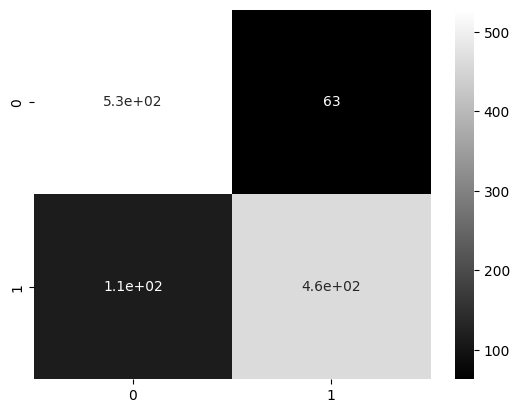

In [29]:
sns.heatmap(cm, cmap='gray', annot=True)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       591
           1       0.88      0.80      0.84       576

    accuracy                           0.85      1167
   macro avg       0.85      0.85      0.85      1167
weighted avg       0.85      0.85      0.85      1167

